In [1]:
%pip install openpyxl
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [3]:
def split_and_explode_column(df : pd.DataFrame, col : str, sep : str = ";"):

    df = df.copy()

    df[col] = (
        df[col].str.split(sep)
    )

    df = df.explode(col)

    return df


# Overall survey responses

In [4]:
xlsx_survey = pd.ExcelFile("data_in/Tech & Engineering Survey(1-34)_edited.xlsx")
df_overall_survey = pd.read_excel(xlsx_survey, 'SurveyResults')

# LaptopModel

Text(0.5, 1.0, 'What is the model of the laptop(s) you are using?\xa0')

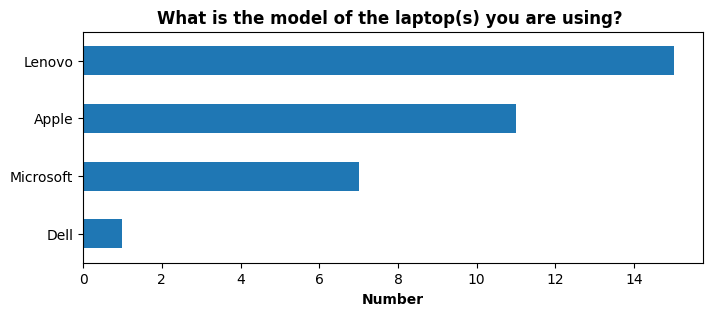

In [17]:
laptop_model_question = 'What is the model of the laptop(s) you are using?\xa0'
df_laptop_model = pd.read_excel(xlsx_survey, 'LaptopModel')

ax = df_laptop_model['Brand'].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
plt.xlabel("Number", fontweight = "bold")
plt.title(laptop_model_question, fontweight = "bold")


# LaptopIssue

,ID,Response,value
0,1,Frequent crashes/reboots,1.0
1,2,Frequent crashes/reboots,1.0
4,5,Frequent crashes/reboots,1.0
17,18,Frequent crashes/reboots,1.0
18,19,Frequent crashes/reboots,1.0
19,20,Frequent crashes/reboots,1.0
35,2,Missing/broken Key,1.0
50,17,Missing/broken Key,1.0
61,28,Missing/broken Key,1.0
71,4,No admin rights,1.0


Text(0.5, 1.0, 'What issues do you have with your laptop(s)?\xa0')

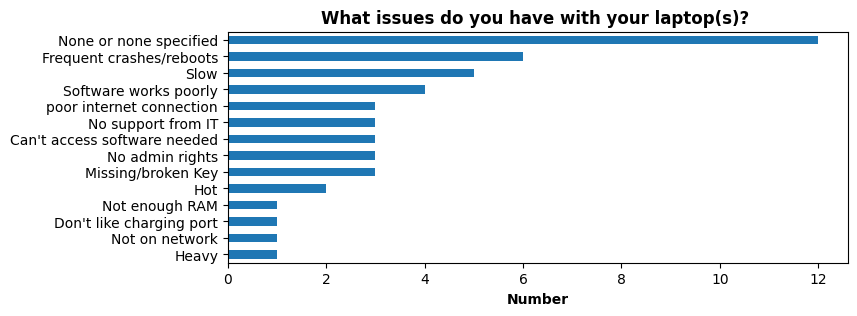

In [41]:
laptop_issue_question = 'What issues do you have with your laptop(s)?\xa0'
df_laptop_issue = pd.read_excel(xlsx_survey, 'LaptopIssue')
laptop_issue_cols = list(df_laptop_issue.columns)
laptop_issue_cols.remove(laptop_issue_question)

df_laptop_issue = pd.melt(
    df_laptop_issue, 
    id_vars=['ID'], 
    value_vars=laptop_issue_cols,
    var_name="Response"    
)

df_laptop_issue = df_laptop_issue[df_laptop_issue['value'] >= 1]
display(df_laptop_issue)
ax = df_laptop_issue["Response"].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
plt.xlabel("Number", fontweight = "bold")
plt.title(laptop_issue_question, fontweight = "bold")

Text(0.5, 1.0, 'People who have any issue with their laptop')

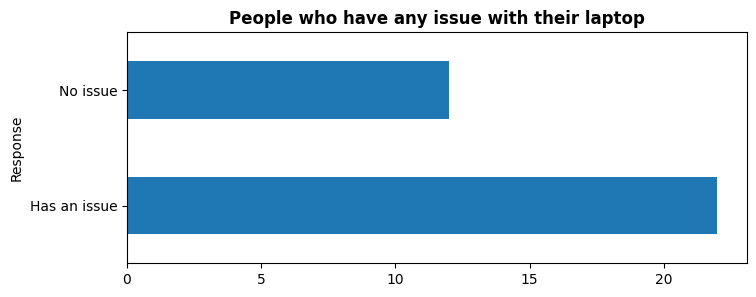

In [54]:
df_laptop_model = pd.read_excel(xlsx_survey, 'LaptopModel')
df_laptop_model = df_laptop_model[ ['ID', 'Brand'] ]

df_laptop_model_by_issue = (df_laptop_model
    .merge(df_laptop_issue, on='ID', how='left')        
)

df_laptop_model_by_issue['Response'] = np.where(
    df_laptop_model_by_issue['Response'] != 'None or none specified',
    'Has an issue',
    'No issue'
)

df_laptop_model_by_issue = df_laptop_model_by_issue.groupby('Response')['ID'].nunique().plot(kind="barh", figsize = (8,3))
plt.title("People who have any issue with their laptop", fontweight = "bold")

Text(0.5, 0, 'Number')

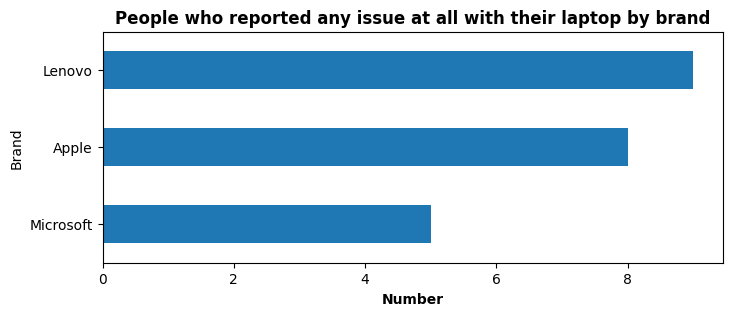

In [69]:
df_laptop_model = pd.read_excel(xlsx_survey, 'LaptopModel')
df_laptop_model = df_laptop_model[ ['ID', 'Brand'] ]

df_laptop_model_by_issue = (df_laptop_model
    .merge(df_laptop_issue, on='ID', how='left')        
)

df_laptop_model_by_issue['Response'] = np.where(
    df_laptop_model_by_issue['Response'] != 'None or none specified',
    'Has an issue',
    'No issue'
)

df_laptop_model_by_issue = df_laptop_model_by_issue[df_laptop_model_by_issue['Response'] == 'Has an issue']

df_laptop_model_by_issue = df_laptop_model_by_issue.groupby('Brand')['ID'].nunique().sort_values()
ax = df_laptop_model_by_issue.plot(kind="barh", figsize = (8,3))
plt.title("People who reported any issue at all with their laptop by brand", fontweight = "bold")
plt.xlabel("Number", fontweight = "bold")

,Brand,has_issue,no_issue
0,Apple,72.727273,27.272727
2,Lenovo,60.000000,40.000000
3,Microsoft,71.428571,28.571429


Text(0.5, 1.0, 'Proportion of people who reported any issue with their laptop by brand')

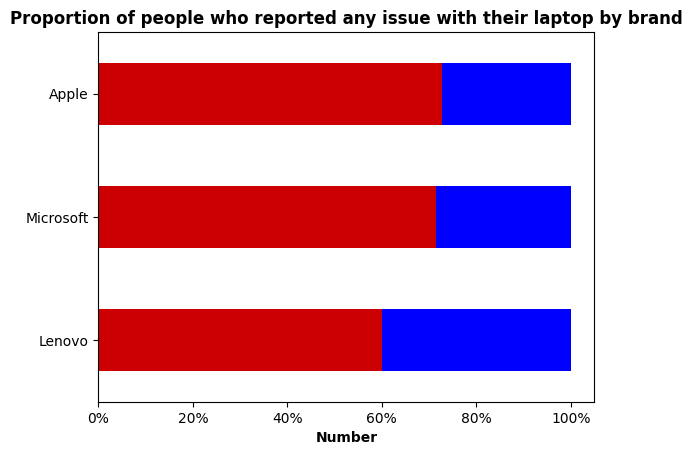

In [119]:


df_laptop_model = pd.read_excel(xlsx_survey, 'LaptopModel')
df_laptop_model = df_laptop_model[ ['ID', 'Brand'] ]
df_laptop_model_counts =  df_laptop_model.groupby('Brand')['ID'].nunique().to_frame(name = 'brand_count').reset_index()

df_laptop_model_by_issue = (df_laptop_model
    .merge(df_laptop_issue, on='ID', how='left')        
)

df_laptop_model_by_issue['Response'] = np.where(
    df_laptop_model_by_issue['Response'] != 'None or none specified',
    'Has an issue',
    'No issue'
)

df_laptop_model_by_issue = df_laptop_model_by_issue[df_laptop_model_by_issue['Response'] == 'Has an issue']

df_laptop_model_by_issue = df_laptop_model_by_issue.groupby('Brand')['ID'].nunique().sort_values().to_frame(name = 'issue_count').reset_index()

df_laptop_model_and_issue_counts = df_laptop_model_counts.merge(df_laptop_model_by_issue, on='Brand', how='left')

df_laptop_model_and_issue_counts['has_issue'] = (
    (df_laptop_model_and_issue_counts['issue_count'] / df_laptop_model_and_issue_counts['brand_count']) * 100
)

df_laptop_model_and_issue_counts['no_issue'] = (
    (100 - df_laptop_model_and_issue_counts['has_issue'])
)

df_laptop_model_and_issue_counts = df_laptop_model_and_issue_counts[ ['Brand', 'has_issue', 'no_issue'] ]

df_laptop_model_and_issue_counts = df_laptop_model_and_issue_counts[df_laptop_model_and_issue_counts['Brand'] != 'Dell']



display(df_laptop_model_and_issue_counts)


ax = df_laptop_model_and_issue_counts.sort_values('has_issue').plot(
    kind='barh', 
    stacked=True,
    color = ['#CC0003', 'blue'],
    legend = False
)
ax.set_yticklabels(df_laptop_model_and_issue_counts.sort_values('has_issue')['Brand'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Number", fontweight = "bold")
plt.title("Proportion of people who reported any issue with their laptop by brand", fontweight = "bold")

# Local Development

In [ ]:
df_local_development = pd.read_excel(xlsx_survey, 'LocalDevelopment')
local_development_cols = list(df_local_development.columns)
local_development_cols.remove('Do you have the capacity to do local development on your laptop? ')
df_local_development = pd.melt(
    df_local_development, 
    id_vars=['ID'], 
    value_vars=local_development_cols,
    var_name="Response"    
)
df_local_development = df_local_development[df_local_development['value'] >= 1]

ax = df_local_development["Response"].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
plt.xlabel("Number", fontweight = "bold")
plt.title("Do you have the capacity to do local development on your laptop?", fontweight = "bold")

# Software Unavailable

,ID,value
Tool,,
Docker,1,1
Java,1,1
None/none specified,28,28
Obsidian,1,1
PDF Editors,1,1
Reference manager (E.g. Mendeley),1,1
VS Code,1,1
VS Code Extensions,1,1
WSL,1,1


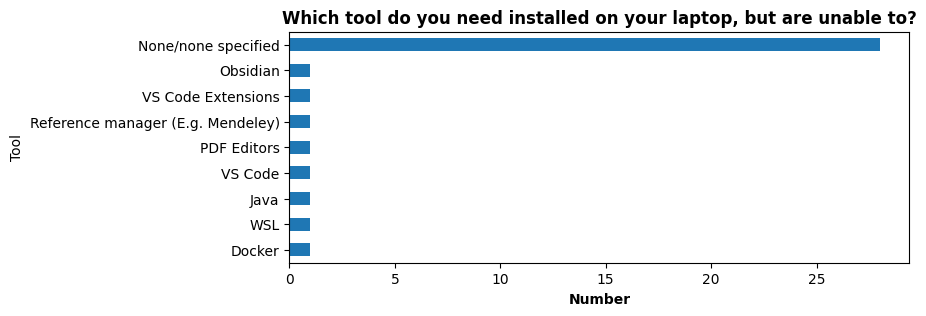

In [121]:
df_software_unavailable = pd.read_excel(xlsx_survey, 'SoftwareUnavailable')
software_unavailable_cols = list(df_software_unavailable.columns)
software_unavailable_cols.remove('Which software or tool do you need installed on your laptop, but are unable to do so? (e.g. VPNs)')
df_software_unavailable = pd.melt(
    df_software_unavailable, 
    id_vars=['ID'], 
    value_vars=software_unavailable_cols,
    var_name="Tool"    
)
df_software_unavailable = df_software_unavailable[df_software_unavailable['value'] >= 1]
df_software_unavailable["Tool"].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
plt.xlabel("Number", fontweight = "bold")
plt.title("Which tool do you need installed on your laptop, but are unable to?", fontweight = "bold")

df_software_unavailable.groupby("Tool").count()

# WSL

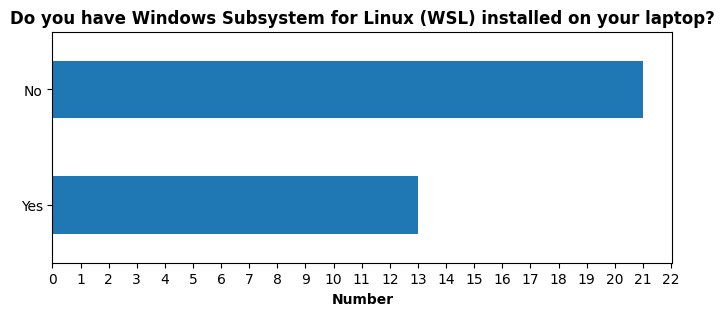

In [128]:
from matplotlib.ticker import MaxNLocator

wsl_question = "Do you have Windows Subsystem for Linux (WSL) installed on your laptop?"

df_overall_survey[wsl_question] = np.where(
    df_overall_survey[wsl_question] == "Yes",
    "Yes",
    "No"                                   
)

ax = df_overall_survey[wsl_question].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Number", fontweight = "bold")
plt.title(wsl_question, fontweight = "bold")
plt.xticks(range(0,23));



# Local Development

Text(0.5, 1.0, 'Do you have the capacity to do local development on your laptop?')

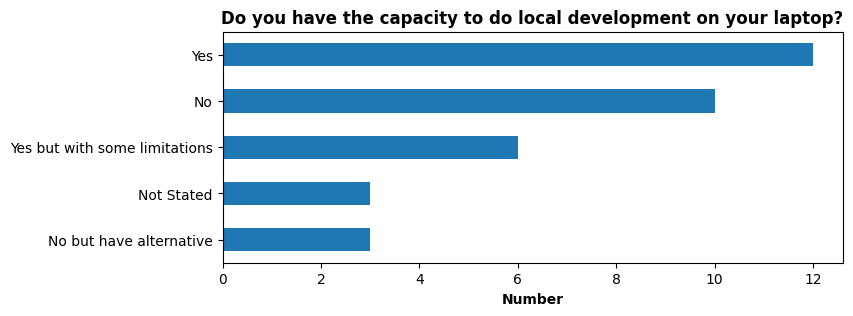

In [36]:
df_local_development = pd.read_excel(xlsx_survey, 'LocalDevelopment')
local_development_cols = list(df_local_development.columns)
local_development_cols.remove('Do you have the capacity to do local development on your laptop? ')
df_local_development = pd.melt(
    df_local_development, 
    id_vars=['ID'], 
    value_vars=local_development_cols,
    var_name="Response"    
)
df_local_development = df_local_development[df_local_development['value'] >= 1]

ax = df_local_development["Response"].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
plt.xlabel("Number", fontweight = "bold")
plt.title("Do you have the capacity to do local development on your laptop?", fontweight = "bold")

# Virtual Machine

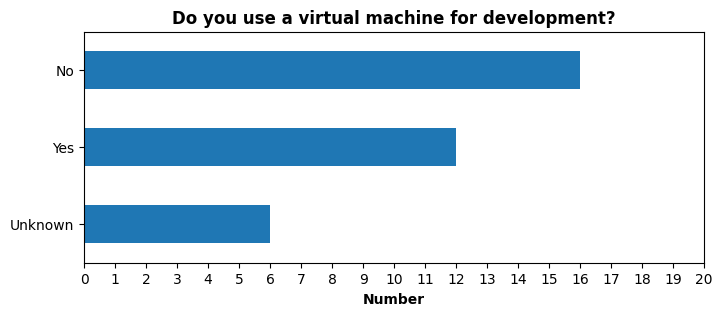

In [38]:
vm_question = "Do you use a virtual machine for development?"
vm_count_col = "Category"

df_vm = pd.read_excel(xlsx_survey, 'VirtualMachine')

ax = df_vm[vm_count_col].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
plt.xlabel("Number", fontweight = "bold")
plt.title(vm_question, fontweight = "bold")
plt.xticks(range(0,21));

# I can do my job

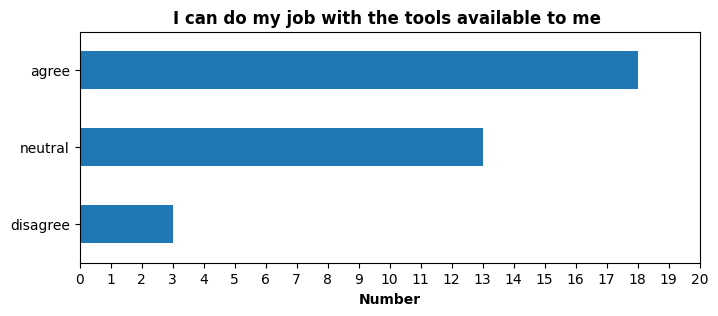

In [43]:
do_job_question = "I can do my job with the tools available to me "

ax = df_overall_survey[do_job_question].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
ax.set_ylabel("")
plt.xlabel("Number", fontweight = "bold")
plt.title(do_job_question, fontweight = "bold")
plt.xticks(range(0,21));